#                  `Business Case: Yulu - Hypothesis Testing`

## Defining Problem Statement and Analyzing basic metrics

###	Business Problem
<font color='Blue'>
    
* Yulu has recently suffered considerable dips in its revenues.
* They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. 
* Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
</font>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import chi2, chisquare, chi2_contingency
from scipy.stats import f_oneway, kruskal, levene

In [3]:
df = pd.read_csv("C:/Scaler_DSML/Project/Yulu/bike_sharing.txt")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


###	Analyzing basic metrics

###### o	Shape of data: Total of 10886 rows × 12 columns.

In [4]:
df.shape

(10886, 12)

###### o	Data types of all the attributes as received in source: 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### o	Conversion of categorical attributes to 'category':

- Converted 4 columns into category data type.

- It has helped in reduction of memory usage.

In [5]:
df = df.apply(lambda s: s.astype('category') 
              if s.name in ['holiday','season','workingday','weather'] else s)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


#### o	Statistical summary Numerical variables:
- count has mean 191 but median is 145.

- count has significant difference in mean and median values.

In [7]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### o	Statistical summary categorical variables:

- Season: Season (1: spring, 2: summer, 3: fall, 4: winter)
- Holiday: Whether day is a holiday or not ( 1- holiday, 0- non holiday )
- Workingday: If day is neither weekend nor holiday is 1, otherwise is 0.


- Weather:
    1. Clear, Few clouds, partly cloudy, partly cloudy    
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [8]:
df.describe(include=['category'])

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


### 2)	Non-Graphical Analysis : 
##### Univariate Analysis - countplots of all the categorical variables

##### 1. Categorical Variable : 'season'
    - There are equal number of season data available in the source.
    - Each season has 25% data each in source.

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

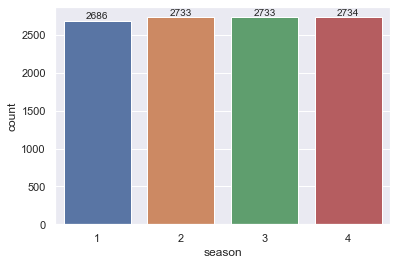

In [9]:
#Categorical Variable : 'season'
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data=df,x="season")
ax.bar_label(container=ax.containers[0])
df['season'].value_counts(normalize=True)*100

##### 2. Categorical Variable : 'holiday'
    - There are 2.8 % holidays in source data
    - 97 % are Non-Holidays in source data    

0    97.14312
1     2.85688
Name: holiday, dtype: float64

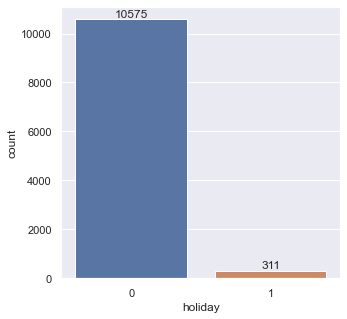

In [10]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(data=df,x="holiday")
ax.bar_label(container=ax.containers[0])
df['holiday'].value_counts(normalize=True)*100

##### 3. Categorical Variable : 'workingday'
- There are 68 % working day in source data.
- There are 31 % non-working day in source data.

1    68.087452
0    31.912548
Name: workingday, dtype: float64

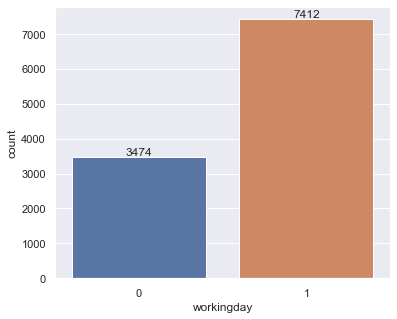

In [11]:
#Categorical Variable : 'workingday'
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data=df,x="workingday")
ax.bar_label(container=ax.containers[0])
df['workingday'].value_counts(normalize=True)*100

##### 4. Categorical Variable : 'weather'
- There are 66 % of 1: ( Clear, Few clouds, partly cloudy, partly cloudy) in source data.
- There are 26 % of 2: ( Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) in source data.
- There are 7  % of 3: (Light Snow, Light Rain + Thunderstorm + Scattered clouds) in source data.
- There are 0  % of 4: (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) in source data.    

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

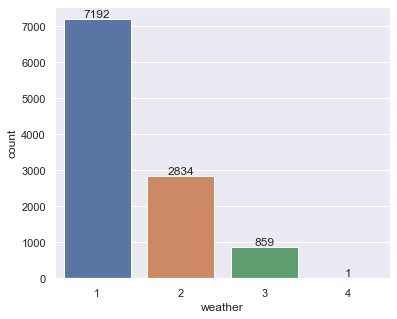

In [12]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data=df,x="weather")
ax.bar_label(container=ax.containers[0])
df['weather'].value_counts(normalize=True)*100

### `Univariate Analysis - distribution plots of all the continuous variable(s)`
#### 1. Continuous Variable : 'temp'
- Range of temp is from 0 to 41 Celsius
- Median and mean both are 20 Celsius.
- 75% of the data is below 26 Celsius.

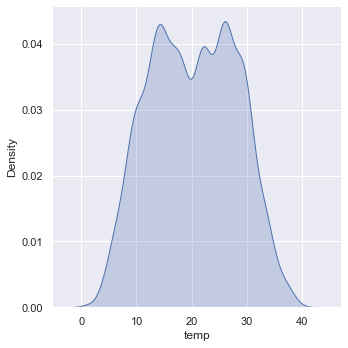

In [13]:
#Continuous Variable : 'temp'
sns.displot(data=df, x="temp", kind='kde', fill=True)

#### 2. Continuous Variable : 'atemp'
- Range of temp is from 0 to 45 Celsius
- Median is 24 and mean is 23 Celsius.
- 75% of the data is below 31 Celsius.

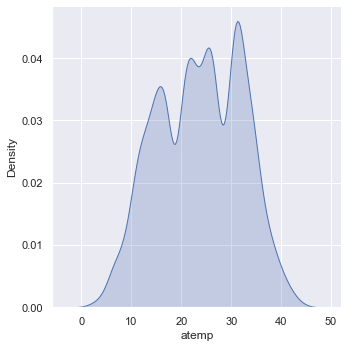

In [14]:
sns.displot(data=df, x="atemp", kind='kde', fill=True)

#### 3. Continuous Variable : 'humidity'
- Range of temp is from 0 to 100 Celsius
- Median is 62 and mean is 61 Celsius.
- 75% of the data is below 77 Celsius.
- `Distribution is normal`

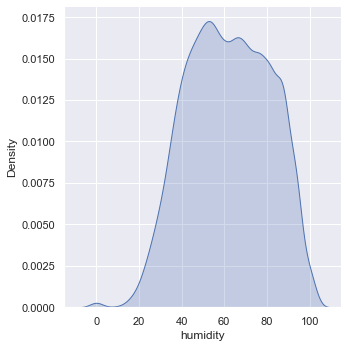

In [15]:
sns.displot(data=df, x="humidity", kind='kde', fill=True)

#### 4. Continuous Variable : 'windspeed'
- Range of temp is from 0 to 56 
- Median and mean 12.
- 75% of the data is below 16.
- It is a right-skewed distribution.

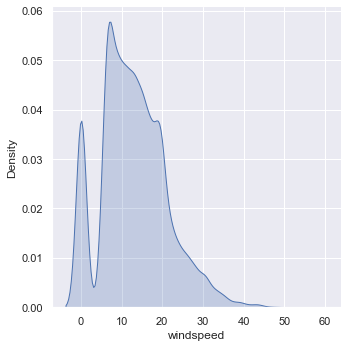

In [16]:
sns.displot(data=df, x="windspeed", kind='kde', fill=True)

#### 5. Continuous Variable : 'casual'
- Range of temp is from 0 to 367 users.
- Median is 17 and mean is 36 users.
- 75% of the data is below 46 users.
- It is a right-skewed distribution.

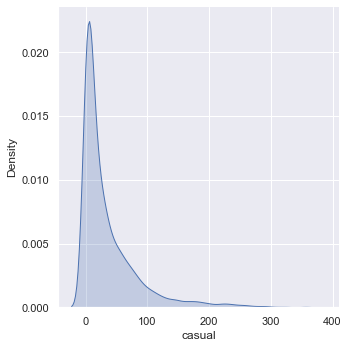

In [17]:
sns.displot(data=df, x="casual", kind='kde', fill=True)

#### 6. Continuous Variable : 'registered'
- Range of temp is from 0 to 886 users.
- Median is 188 and mean is 155 users.
- 75% of the data is below 222 users.
- It is a right-skewed distribution.

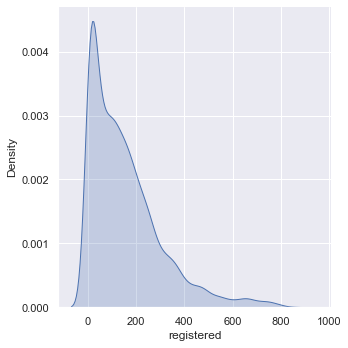

In [18]:
sns.displot(data=df, x="registered", kind='kde', fill=True)

#### 7. Continuous Variable : 'count'
- Range of temp is from 1 to 977 users.
- Median is 145 and mean is 191 users.
- 75% of the data is below 284 users.
- It is a right-skewed distribution.

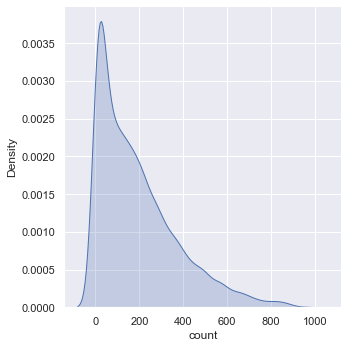

In [19]:
sns.displot(data=df, x="count",kind='kde',  fill=True)

### `Bivariate Analysis (Relationships between important variables`
#### 1.  workday and count //  season and count // weather and count
- working day has near equal impact on cycles rented by no. of users on a given day
- Season '3' has highest amount of users followed by season '2' then season '4'.
- weather 4 is clear outlier in the data.
- weather also has impact on the no. of cycle rented.

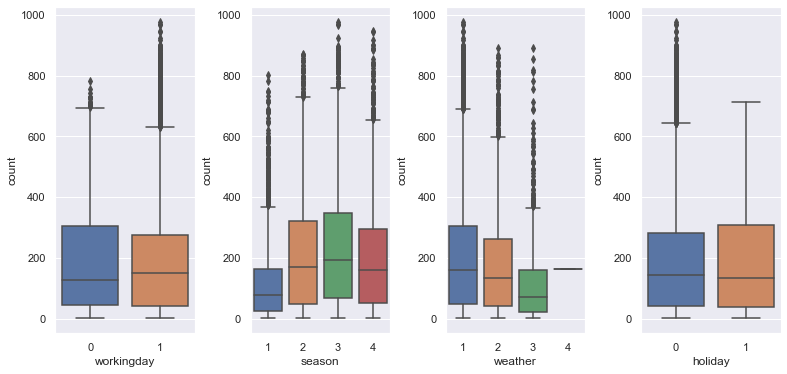

In [20]:
fig,axes=plt.subplots(1,4, figsize=(13, 6))
plt.subplots_adjust(wspace=0.4) 
sns.boxplot(x=df["workingday"], y=df["count"] ,ax=axes[0])
sns.boxplot(x=df["season"], y=df["count"],ax=axes[1])
sns.boxplot(x=df["weather"], y=df["count"], ax=axes[2])
sns.boxplot(x=df["holiday"], y=df["count"], ax=axes[3])
plt.show()

#### 2.  workday and registered //  season and registered // weather and registered // holiday and registered
- working day has near equal impact on cycles rented by no. of users on a given day
- Season '3' has highest amount of users followed by season '2' then season '4'.
- weather 4 is clear outlier in the data.
- weather also has impact on the no. of cycle rented.

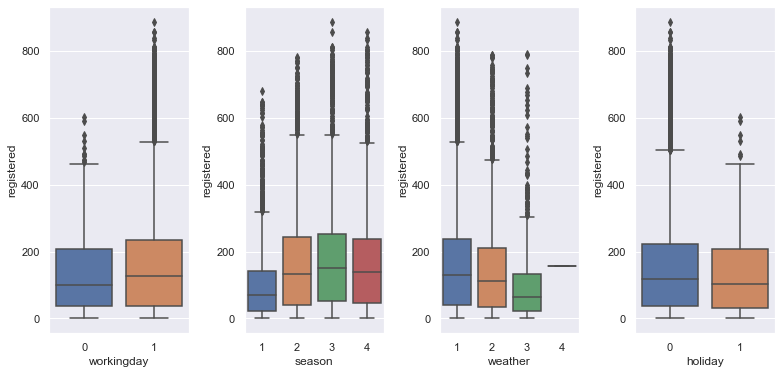

In [21]:
fig,axes=plt.subplots(1,4, figsize=(13, 6))
plt.subplots_adjust(wspace=0.4) 
sns.boxplot(x=df["workingday"], y=df["registered"] ,ax=axes[0])
sns.boxplot(x=df["season"], y=df["registered"],ax=axes[1])
sns.boxplot(x=df["weather"], y=df["registered"], ax=axes[2])
sns.boxplot(x=df["holiday"], y=df["registered"], ax=axes[3])
plt.show()

#### 3.  workday and casual //  season and casual // weather and casual // holiday and casual
- working day has near equal impact on cycles rented by no. of users on a given day.
- Casual user rent more cycles on non working days/ holidays as compared to working days.
- On a clear day more casual user rent cycles. 
- Season '3' has highest amount of users followed by season '2' then season '4'.
- weather 4 is clear outlier in the data.
- weather also has impact on the no. of cycle rented.

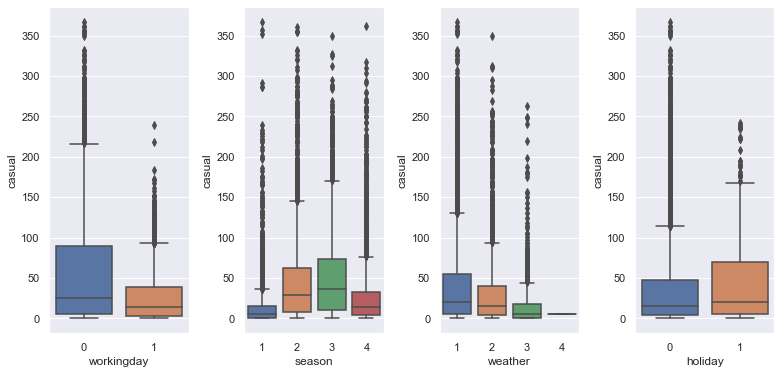

In [22]:
fig,axes=plt.subplots(1,4, figsize=(13, 6))
plt.subplots_adjust(wspace=0.4) 
sns.boxplot(x=df["workingday"], y=df["casual"] ,ax=axes[0])
sns.boxplot(x=df["season"], y=df["casual"],ax=axes[1])
sns.boxplot(x=df["weather"], y=df["casual"], ax=axes[2])
sns.boxplot(x=df["holiday"], y=df["casual"], ax=axes[3])
plt.show()

## 4. Heat map

- Registered user are majority of users who rent cycles with 0.97 correlation.
- Casual user are majority of users who rent cycles with 0.69 correlation.
- humidity has negative correlation with no. of cycle rented.
- Temperature also has slight correlation of 0.39 is with no. of cycles being rented.

<AxesSubplot:>

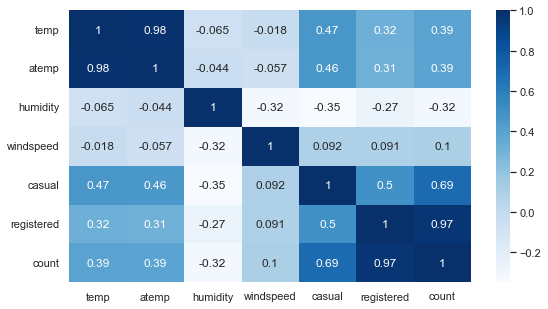

In [23]:
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True,cmap='Blues')

### Outliers Detection for variable 'count'.

In [24]:
# Outliers Detection for "count" overall data
#--------------------------------------
IQR = df["count"].quantile(0.75)-df["count"].quantile(0.25)
upperLimit= df["count"].quantile(0.75)+ IQR*1.5 
lowerLimit= df["count"].quantile(0.25)- IQR*1.5
print('upper Limit: ',upperLimit)
print('lower Limit: ',lowerLimit)
df[(df["count"] <lowerLimit) | (df["count"] > upperLimit)]

upper Limit:  647.0
lower Limit:  -321.0


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662


### Outliers Detection for variable 'temp'
- There is No outliers in temp variable

In [25]:
# Outliers Detection for "temp" overall data
#--------------------------------------
IQR = df["temp"].quantile(0.75)-df["temp"].quantile(0.25)
upperLimit= df["temp"].quantile(0.75)+ IQR*1.5 
lowerLimit= df["temp"].quantile(0.25)- IQR*1.5
print('upper Limit: ',upperLimit)
print('lower Limit: ',lowerLimit)
df[(df["temp"] <lowerLimit) | (df["temp"] > upperLimit)]

upper Limit:  44.69
lower Limit:  -4.51


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


### Outliers Detection for variable 'atemp'
- There is No outliers in atemp variable

In [26]:
# Outliers Detection for "atemp" overall data
#--------------------------------------
IQR = df["atemp"].quantile(0.75)-df["atemp"].quantile(0.25)
upperLimit= df["atemp"].quantile(0.75)+ IQR*1.5 
lowerLimit= df["atemp"].quantile(0.25)- IQR*1.5
print('upper Limit: ',upperLimit)
print('lower Limit: ',lowerLimit)
df[(df["atemp"] <lowerLimit) | (df["atemp"] > upperLimit)]

upper Limit:  52.6525
lower Limit:  -4.927500000000002


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


### >>> Creating new Variable just for Month to check "Month" relation with "count"

In [27]:
df['month'] = pd.to_datetime(df['datetime']).dt.month
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


#### Findings
- From January to June there is gradual increase in the no. of cycles rented
- From June to October no. of cycles rented is close to constant with mild variation in no.
- From January to june there is gradual increase in the no. of cycles rented
- June month maximum users take cycle for rent.

[Text(0, 0, '79884'),
 Text(0, 0, '99113'),
 Text(0, 0, '133501'),
 Text(0, 0, '167402'),
 Text(0, 0, '200147'),
 Text(0, 0, '220733'),
 Text(0, 0, '214617'),
 Text(0, 0, '213516'),
 Text(0, 0, '212529'),
 Text(0, 0, '207434'),
 Text(0, 0, '176440'),
 Text(0, 0, '160160')]

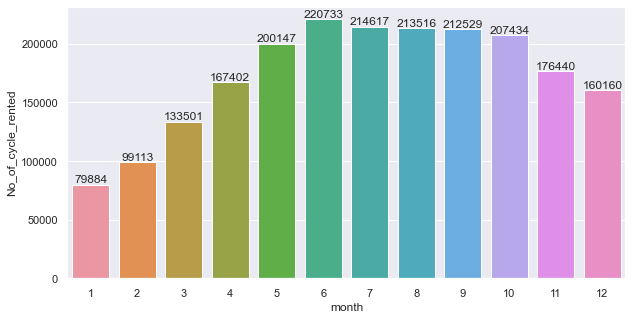

In [28]:
m = pd.DataFrame({'No_of_cycle_rented' : df.groupby([ "month"])['count'].sum()}).reset_index()
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(data=m, x="month", y="No_of_cycle_rented")
ax.bar_label(container=ax.containers[0])

In [29]:
# #Categorical Variable : 'month'
# sns.set(rc={'figure.figsize':(6,5)})
# ax = sns.countplot(data=df,x="month")
# ax.bar_label(container=ax.containers[0])
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
# df['month'].value_counts(normalize=True)*100

### `1. Two Sample T-Test : To check if Working Day has an effect on the number of electric cycles rented`
#### Null hypothesis      (Ho): (μ1 = μ2) Difference between means of rented cycle on working day and non-working day is zero .
#### Alternate hypothesis (Ha): (μ1 ≠ μ2) Difference between means of rented cycle on working day and non-working day is not zero.

In [30]:
no_work_day= np.array(df[df['workingday']==0]['count'])
work_day = np.array(df[df['workingday']==1]['count'])
print('variance on Working Day    : ',np.var(work_day))
print('variance on Non-Working Day: ',np.var(no_work_day))
print('Mean on Working Day        : ',np.mean(work_day) )
print('Mean on Non-Working Day    : ',np.mean(no_work_day))
print()
print('T-Test Statistics: ',stats.ttest_ind(a=no_work_day, b=work_day, equal_var=True))

variance on Working Day    :  34040.69710674686
variance on Non-Working Day:  30171.346098942427
Mean on Working Day        :  193.01187263896384
Mean on Non-Working Day    :  188.50662061024755

T-Test Statistics:  Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)


1. p-value = 0.226
2. significance level (α) = 0.05
3. confidence level = 95% 
###### Decision : Since p-value > significance level (α) : Fail to reject Null hypothesis (Ho) 
###### Inference : Difference between working day and non-working day do not have significant impact on rented cycle on a given day  or in other words means of working and non-working day do not have significant difference to have impact on rented cycle.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###  `2. ANNOVA:  To check if No. of cycles rented is similar or different in different weather.`

#### Null hypothesis      (Ho):    No. of cycles rented is similar in different weathers. (µ1 = µ2 = µ3)
#### Alternate hypothesis (Ha): No. of cycles rented is different for different weathers. (µ1 ≠ µ2 ≠ µ3)

In [31]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

#### Outlier Detection: 
Since weather = 4 is has only 1 count this seems to be a outlier in our data and can be excluded from ANOVA test.

In [32]:
clear_1 = np.array(df[df['weather']==1]['count'])
mist_2 = np.array(df[df['weather']==2]['count'])
lightrain_3 = np.array(df[df['weather']==3]['count'])
print('Variance for weather = 1 : ',np.var(clear_1))
print('Variance for weather = 2 : ',np.var(mist_2))
print('Variance for weather = 3 : ',np.var(lightrain_3))
print('Mean for weather = 1 : ',np.mean(clear_1))
print('Mean for weather = 2 : ',np.mean(mist_2))
print('Mean for weather = 3 : ',np.mean(lightrain_3))
print()
print('Anova Statistics: ',f_oneway(clear_1, mist_2, lightrain_3))

Variance for weather = 1 :  35323.8862270764
Variance for weather = 2 :  28337.246435435423
Variance for weather = 3 :  19182.418761290777
Mean for weather = 1 :  205.23679087875416
Mean for weather = 2 :  178.95553987297106
Mean for weather = 3 :  118.84633294528521

Anova Statistics:  F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)


0. F test statistic = 98.28
1. p-value = 4.976448509904196e-43, which is equal to 0.000
2. significance level (α) = 0.05
3. confidence level = 95% 
###### Decision : Since p-value < significance level (α) : Reject Null hypothesis (Ho) 
###### Inference : There is a statistically significant difference between each weather for the no. of cycles rented. Hence weather does has a impact on cycles rented.

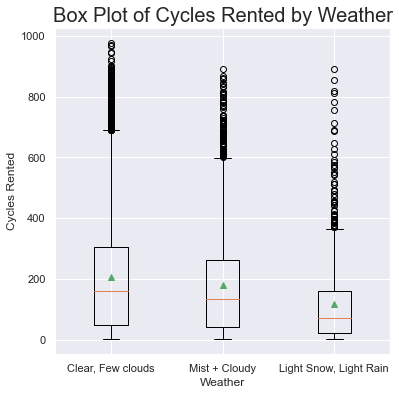

In [33]:
fig = plt.figure(figsize= (6, 6))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Cycles Rented by Weather", fontsize= 20)
ax.set
data = [df[df['weather']==1]['count'],
        df[df['weather']==2]['count'],
        df[df['weather']==3]['count']]

ax.boxplot(data, labels= ['Clear, Few clouds', 'Mist + Cloudy', 'Light Snow, Light Rain'], showmeans= True)
plt.xlabel("Weather")
plt.ylabel("Cycles Rented")
plt.show()

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###  `3. ANNOVA:  To check if No. of cycles rented is similar or different in different season.`

#### Null hypothesis      (Ho): No. of cycles rented is similar in different season. (µ1 = µ2 = µ3 = µ4)
#### Alternate hypothesis (Ha): No. of cycles rented is different for different season. (µ1 ≠ µ2 ≠ µ3 ≠ µ4)

In [34]:
spring = np.array(df[df['season']==1]['count'])
summer = np.array(df[df['season']==2]['count'])
fall = np.array(df[df['season']==3]['count'])
winter = np.array(df[df['season']==4]['count'])
print('Variance for spring = 1 : ',np.var(spring))
print('Variance for summer = 2 : ',np.var(summer))
print('Variance for fall   = 3 : ',np.var(fall))
print('Variance for winter = 4 : ',np.var(winter))
print('Mean for spring = 1 : ',np.mean(spring))
print('Mean for summer = 2 : ',np.mean(summer))
print('Mean for fall   = 3 : ',np.mean(fall))
print('Mean for winter = 4 : ',np.mean(winter))
print()
print('One way Anova Statistics : ',f_oneway(spring, summer, fall, winter))
print('Kruskal-Wallis Statistics: ',kruskal(spring, summer, fall, winter))

Variance for spring = 1 :  15687.725805298038
Variance for summer = 2 :  36853.522249306465
Variance for fall   = 3 :  38854.295089130974
Variance for winter = 4 :  31538.180550642726
Mean for spring = 1 :  116.34326135517499
Mean for summer = 2 :  215.25137211855105
Mean for fall   = 3 :  234.417124039517
Mean for winter = 4 :  198.98829553767374

One way Anova Statistics :  F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)
Kruskal-Wallis Statistics:  KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)


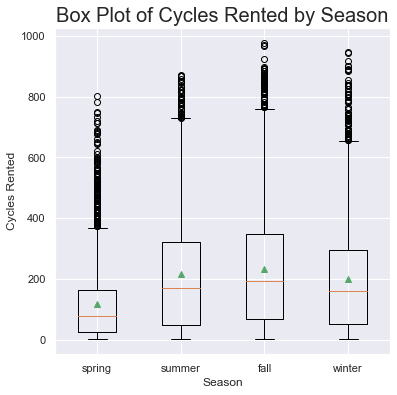

In [35]:
fig = plt.figure(figsize= (6, 6))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Cycles Rented by Season", fontsize= 20)
ax.set
data = [df[df['season']==1]['count'],
        df[df['season']==2]['count'],
        df[df['season']==3]['count'],
        df[df['season']==4]['count']]

ax.boxplot(data, labels= ['spring', 'summer', 'fall','winter'], showmeans= True)
plt.xlabel("Season")
plt.ylabel("Cycles Rented")
plt.show()

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###  `4. Chi-square:  To check weather is dependent on season or not.`

### CHI-SQUARE TEST OF INDEPENDENCE WITH SCIPY.STATS
#### Null hypothesis      (Ho): Weather is not dependent on Season.
#### Alternate hypothesis (Ha): Weather is dependent on Season.

In [36]:
df1 = df[df['weather']!=4]

#### Outlier Detection: 
Since weather = 4 is has only 1 count this seems to be a outlier in our data and can be excluded from CHI-SQUARE test.

#### ASSUMPTION CHECK

1. The two samples are independent- The variables were collected independently of each other

2. No expected cell count is = 0
3. No more than 20% of the cells have and expected cell count < 5, based on below crosstab table


### Levene’s test 
#####  Null hypothesis Ho: The variance among season is equal.
#####  Alternative  hypothesis Ha: The variance among season is not equal.

In [37]:
# Levene’s test
spring = np.array(df[df['season']==1]['count'])
summer = np.array(df[df['season']==2]['count'])
fall = np.array(df[df['season']==3]['count'])
winter = np.array(df[df['season']==4]['count'])

w_stats, p_value = levene(spring,summer,fall,winter,  center ='mean')
w_stats, p_value

(212.51051133288894, 5.725941205064937e-134)

1. p-value = 5.725941205064937e-134, which is equal to 0.000
2. significance level (α) = 0.05
3. confidence level = 95% 
###### Decision : Since p-value < significance level (α) : Reject Null hypothesis (Ho) 
###### Inference : The variance among season is not equal.

In [38]:
crosstab = pd.crosstab(df1["season"], df1["weather"])
crosstab

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [39]:
stats.chi2_contingency(crosstab)

(46.10145731073249,
 2.8260014509929343e-08,
 6,
 array([[1774.04869086,  699.06201194,  211.8892972 ],
        [1805.76352779,  711.55920992,  215.67726229],
        [1805.76352779,  711.55920992,  215.67726229],
        [1806.42425356,  711.81956821,  215.75617823]]))

1. p-value = 2.8260014509929343e-08, which is equal to 0.000
2. significance level (α) = 0.05
3. confidence level = 95% 
###### Decision : Since p-value < significance level (α) : Reject Null hypothesis (Ho) 
###### Inference : Weather is statistically significantly dependent on Season for the cycles to be rented. 

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### >>> Creating new temprature bins just to check "Temp_Bins" relation with "count" <<<

##### Findings: 
- Bin '25-30' has maximum number of user renting cycles.
- Bin '20-25' has second maximum number of user renting cycles.

In [40]:
bins = [0,5,10,15,20,25,30,35,42 ]
df['Temp_Bins'] = pd.cut(df['temp'], bins)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,Temp_Bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,"(5, 10]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,"(5, 10]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,"(5, 10]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,"(5, 10]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,"(5, 10]"


[Text(0, 0, '6871'),
 Text(0, 0, '85270'),
 Text(0, 0, '281255'),
 Text(0, 0, '327978'),
 Text(0, 0, '436728'),
 Text(0, 0, '531537'),
 Text(0, 0, '351600'),
 Text(0, 0, '64237')]

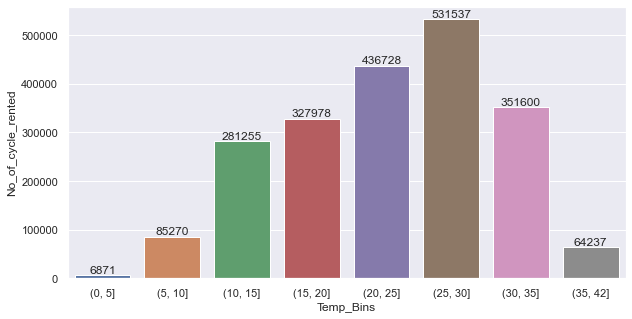

In [41]:
t = pd.DataFrame({'No_of_cycle_rented' : df.groupby([ "Temp_Bins"])['count'].sum()}).reset_index()
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(data=t, x="Temp_Bins", y="No_of_cycle_rented")
ax.bar_label(container=ax.containers[0])

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
pd.crosstab(index =df1["season"], columns = df1["weather"] ,
            margins = True,normalize='all').round(4)*100

weather,1,2,3,All
season,,,,
1,16.16,6.57,1.94,24.67
2,16.55,6.50,2.06,25.11
3,17.73,5.55,1.83,25.11
4,15.64,7.41,2.07,25.12
All,66.07,26.04,7.89,100.00


## >>> Business Insights <<<
- Fall Season is generating maximum revenue with highest mean 234 users renting cycles.
- Fall season with weather type ‘1’ has highest 17 % user renting cycles.
- In weather type ‘1’ max user rent cycles.
- Working day has near equal impact on cycles rented by no. of users on a given day.
- Casual user rent more cycles on non-working days/ holidays as compared to working days.
- On a clear day more casual user rent cycle.
- Weather 4 is clear outlier in the data.
- Weather also has impact on the no. of cycle rented.
- Working day has near equal impact on cycles rented by no. of users on a given day
- Season '3' has highest amount of users followed by season '2' then season '4'.

## >>>	Recommendations <<<

- In bad weather extremely less user rent cycles, suggest to have better parking facility to avoid damage

  to in case of bad weather, this will save repair cost.


- Give initial discounts to casual user to encourage them to make as registered users.
- Have more cycles available in clear day, weather type '1' which has maximum user renting cycles.
- Discounts for users renting in groups.
- Have special holiday prices as lot of casual users renting cycles.
- Based on weather forecast keep maximum cycles available for renting at weather type '1' as 66% of 

  users tend to rent cycle on that given day.
  
  
- In fall season on weather type '1' is the best time to launch new offers and schemes to attract new users.
- Spring season has least number of users with high cases of outliers.

  